In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [27]:
columns_to_skip = ['Freq']
df = pd.read_csv('./data.csv', sep=';', usecols=lambda x: x not in columns_to_skip)
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"])
df = df.drop(columns=["Date", "Time"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Pressure 1  4898 non-null   float64       
 1   Pressure 2  4898 non-null   float64       
 2   Datetime    4898 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2)
memory usage: 114.9 KB


In [28]:
df.head()

,Pressure 1,Pressure 2,Datetime
0,0.24,0.26,2024-11-13 14:21:23
1,0.23,0.26,2024-11-13 14:21:27
2,0.23,0.26,2024-11-13 14:21:28
3,0.24,0.27,2024-11-13 14:21:29
4,0.25,0.28,2024-11-13 14:21:30


In [44]:
def plot_pressure(df, start_time, end_time, name, interval=10):
    """
    Функция для построения графика давления в заданном временном диапазоне.
    
    Параметры:
    - df: DataFrame, содержащий данные, включая столбец 'Datetime', 'Pressure 1' и 'Pressure 2'.
    - start_time: str, начальное время в формате "YYYY-MM-DD HH:MM".
    - end_time: str, конечное время в формате "YYYY-MM-DD HH:MM".
    """
    # Фильтрация данных по диапазону времени
    filtered_df = df[(df["Datetime"] >= pd.to_datetime(start_time)) & 
                     (df["Datetime"] <= pd.to_datetime(end_time))]
    
    # Построение графика
    plt.figure(figsize=(10, 5))
    plt.plot(filtered_df["Datetime"], filtered_df["Pressure 1"], label="Pressure 1", color="blue", linewidth=2)
    plt.plot(filtered_df["Datetime"], filtered_df["Pressure 2"], label="Pressure 2", color="orange", linewidth=2)
    plt.title(name, fontsize=16)
    plt.xlabel("Datetime", fontsize=14)
    plt.ylabel("Pressure", fontsize=14)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
    plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=interval))
    plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1))
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    os.makedirs("pic", exist_ok=True)
    save_path = os.path.join("pic", name)
    plt.savefig(save_path, dpi=300)  # Сохраняем график с высоким качеством (300 dpi)
    plt.show()


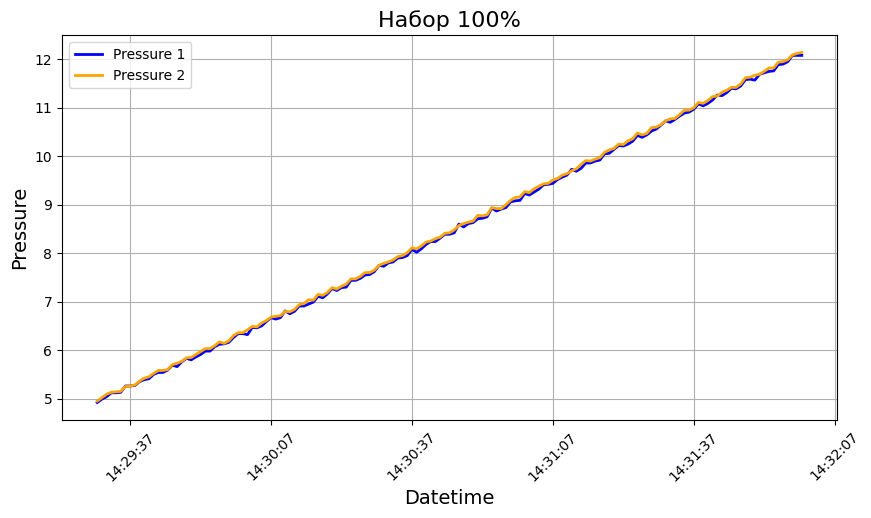

,Pressure 1,Pressure 2,Datetime
484,4.92,4.95,2024-11-13 14:29:30


,Pressure 1,Pressure 2,Datetime
634,12.08,12.14,2024-11-13 14:32:00


In [45]:
plot_pressure(df, "2024-11-13 14:29:30", "2024-11-13 14:32:00", 'Набор 100%', 30)
display(df[df['Datetime'] == pd.to_datetime('2024-11-13 14:29:30')])
display(df[df['Datetime'] == pd.to_datetime('2024-11-13 14:32:00')])

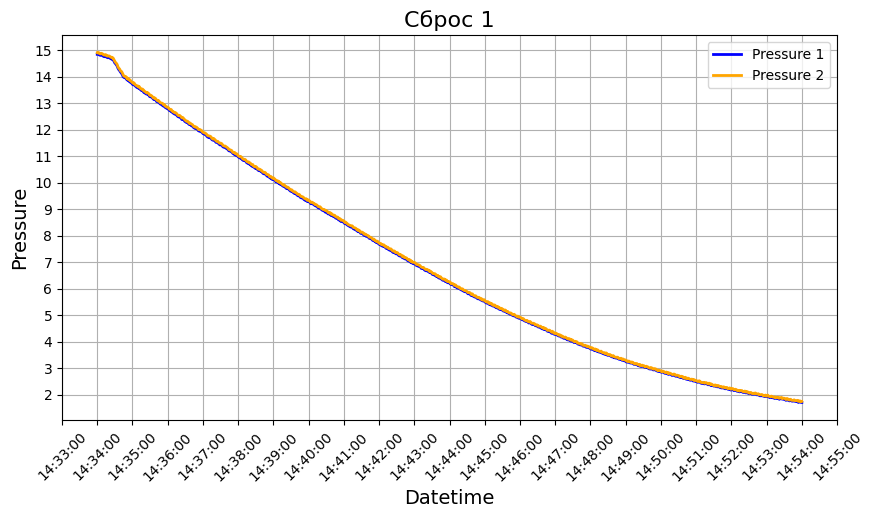

In [46]:
plot_pressure(df, "2024-11-13 14:34:00", "2024-11-13 14:54:00", 'Сброс 1', 60)

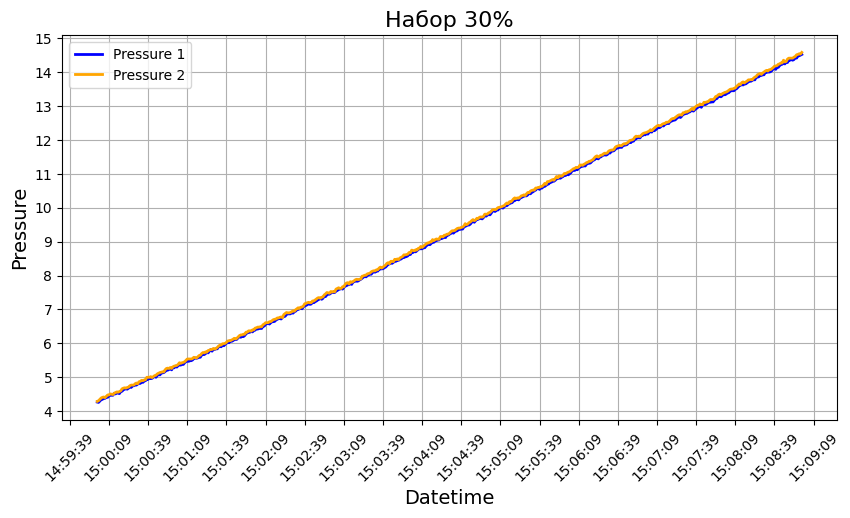

,Pressure 1,Pressure 2,Datetime
2278,4.27,4.29,2024-11-13 15:00:00


,Pressure 1,Pressure 2,Datetime
2818,14.52,14.58,2024-11-13 15:09:00


In [47]:
plot_pressure(df, "2024-11-13 15:00:00", "2024-11-13 15:09:00", 'Набор 30%', 30)
display(df[df['Datetime'] == pd.to_datetime('2024-11-13 15:00:00')])
display(df[df['Datetime'] == pd.to_datetime('2024-11-13 15:09:00')])

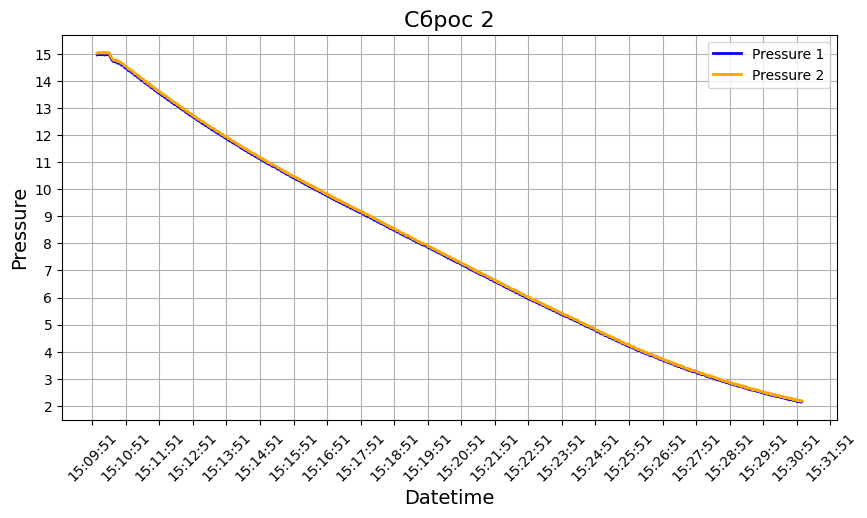

In [48]:
plot_pressure(df, "2024-11-13 15:10:00", "2024-11-13 15:31:00", 'Сброс 2', 60)

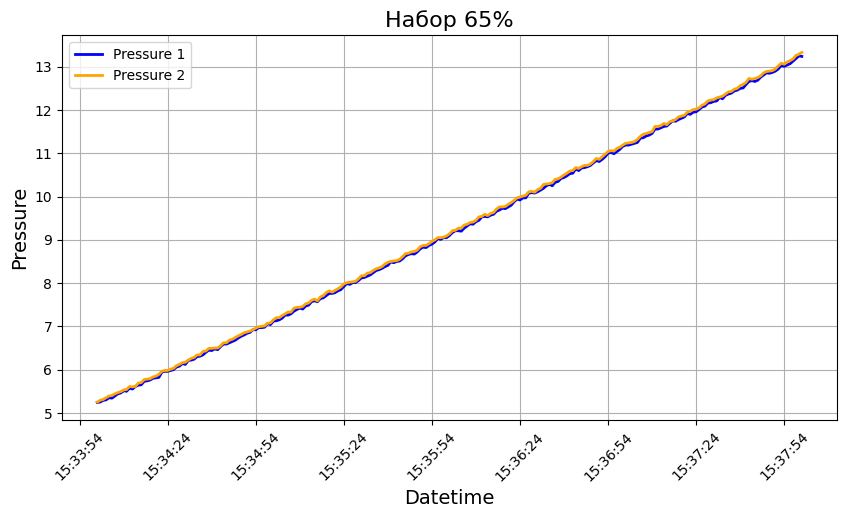

,Pressure 1,Pressure 2,Datetime
4318,5.24,5.25,2024-11-13 15:34:00


,Pressure 1,Pressure 2,Datetime
4558,13.24,13.33,2024-11-13 15:38:00


In [49]:
plot_pressure(df, "2024-11-13 15:34:00", "2024-11-13 15:38:00", 'Набор 65%', 30)
display(df[df['Datetime'] == pd.to_datetime('2024-11-13 15:34:00')])
display(df[df['Datetime'] == pd.to_datetime('2024-11-13 15:38:00')])

In [50]:
def time_formatter(x, pos):
    minutes, seconds = divmod(x, 60)
    hours, minutes = divmod(minutes, 60)
    return f'{int(hours):02d}:{int(minutes):02d}:{int(seconds):02d}'

def plot_multiple_intervals(df, intervals, name, interval=10):
    """
    Функция для построения графика давления для нескольких временных интервалов.
    
    Параметры:
    - df: DataFrame, содержащий данные, включая столбец 'Datetime', 'Pressure 1' и 'Pressure 2'.
    - intervals: list of tuples, каждый элемент - кортеж из 3 строк (start_time, end_time, interval_name).
    - name: str, имя файла для сохранения графика.
    - interval: int, шаг сетки на оси X в секундах.
    """
    plt.figure(figsize=(12, 6))
    
    for start_time, end_time, interval_name in intervals:
        # Фильтрация данных по текущему временному интервалу
        filtered_df = df[(df["Datetime"] >= pd.to_datetime(start_time)) & 
                         (df["Datetime"] <= pd.to_datetime(end_time))].copy()
        
        # Преобразование времени в количество секунд от начала интервала
        start_datetime = pd.to_datetime(start_time)
        filtered_df["Seconds"] = (filtered_df["Datetime"] - start_datetime).dt.total_seconds()

        # Построение графиков
        plt.plot(
            filtered_df["Seconds"], 
            filtered_df["Pressure 1"], 
            label=f"Pressure 1 ({interval_name})", 
            linewidth=2
        )
        plt.plot(
            filtered_df["Seconds"], 
            filtered_df["Pressure 2"], 
            label=f"Pressure 2 ({interval_name})", 
            linewidth=2
        )
    
    # Настройки графика
    plt.gca().set_xlim(left=0)
    plt.title(name, fontsize=16)
    plt.xlabel("Time", fontsize=14)
    plt.ylabel("Pressure", fontsize=14)
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(time_formatter))
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(interval))
    plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1))
    plt.legend(loc='best')
    plt.grid(True)
    plt.xticks(rotation=45)
    os.makedirs("pic", exist_ok=True)
    save_path = os.path.join("pic", name)
    plt.savefig(save_path, dpi=300)  # Сохраняем график с высоким качеством (300 dpi)
    plt.show()


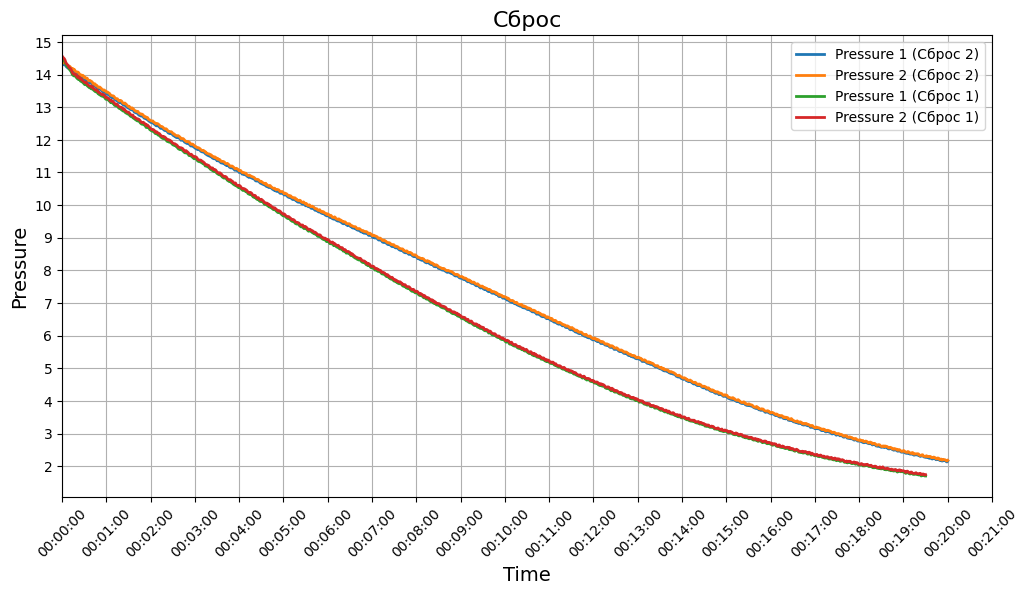

In [51]:
plot_multiple_intervals(df, [("2024-11-13 15:11:00", "2024-11-13 15:31:00", 'Сброс 2'),
                             ("2024-11-13 14:34:30", "2024-11-13 14:54:00", 'Сброс 1')],
                        'Сброс', 60)

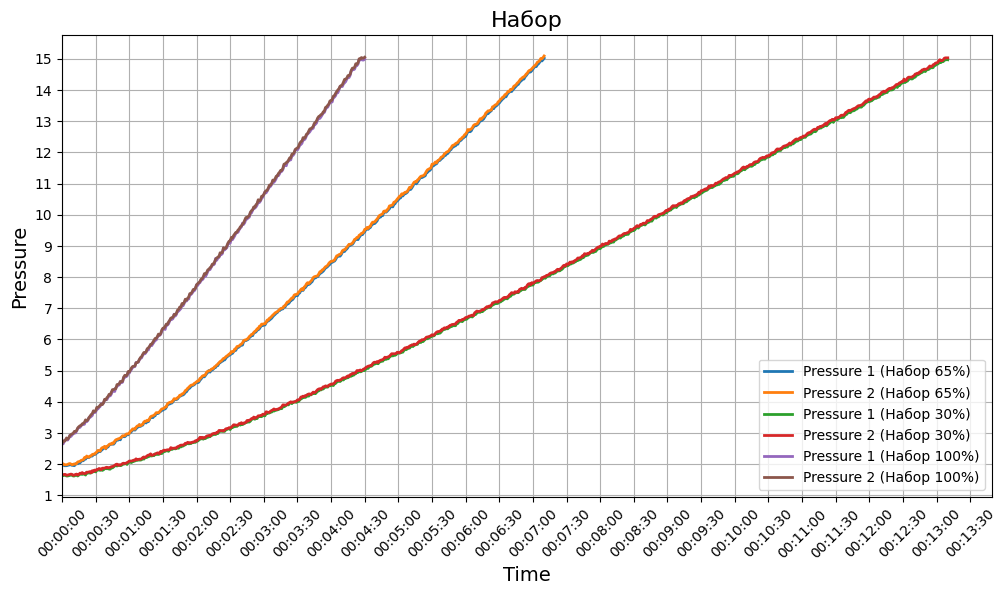

In [43]:
plot_multiple_intervals(df, [("2024-11-13 15:31:40", "2024-11-13 15:38:50", 'Набор 65%'),
                             ("2024-11-13 14:56:15", "2024-11-13 15:09:25", 'Набор 30%'),
                             ("2024-11-13 14:28:30", "2024-11-13 14:33:00", 'Набор 100%')],
                        'Набор', 30)

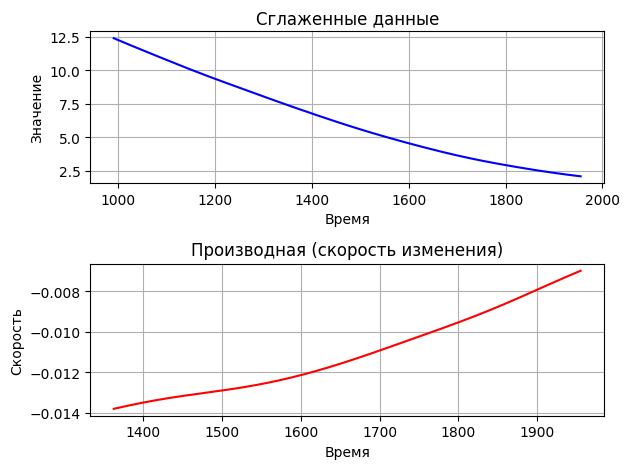

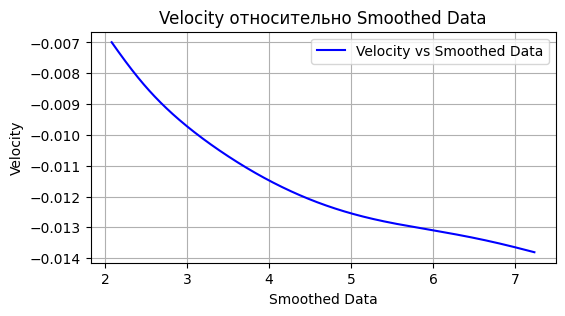

In [153]:
df_down_1 = df[(df["Datetime"] >= pd.to_datetime("2024-11-13 14:35:00")) & 
                    (df["Datetime"] <= pd.to_datetime("2024-11-13 14:54:00"))].copy()

smoothed_data = df_down_1['Pressure 2'].rolling(window=100).mean().dropna()
smoothed_data = smoothed_data.rolling(window=50).mean().dropna()  
smoothed_data = smoothed_data.rolling(window=20).mean().dropna()  
smoothed_data = smoothed_data.rolling(window=10).mean().dropna()  
smoothed_data = smoothed_data.rolling(window=2).mean().dropna()  

velocity = smoothed_data.diff().dropna() 
velocity = velocity.rolling(window=150).mean().dropna()
velocity = velocity.rolling(window=100).mean().dropna()
velocity = velocity.rolling(window=75).mean().dropna()
velocity = velocity.rolling(window=50).mean().dropna()

# График сглаженных данных
plt.subplot(2, 1, 1)
plt.plot(smoothed_data, label='Сглаженные данные', color='blue')
plt.title('Сглаженные данные')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.grid(True)


# График производной
plt.subplot(2, 1, 2)
plt.plot(velocity, label='Скорость изменения', color='red')
plt.title('Производная (скорость изменения)')
plt.xlabel('Время')
plt.ylabel('Скорость')
plt.grid(True)

plt.tight_layout()
plt.show()

smoothed_data_aligned = smoothed_data.iloc[len(smoothed_data) - len(velocity):]

# Строим график
plt.figure(figsize=(6, 3))
plt.plot(smoothed_data_aligned, velocity, label='Velocity vs Smoothed Data', color='blue')
plt.title('Velocity относительно Smoothed Data')
plt.xlabel('Smoothed Data')
plt.ylabel('Velocity')
plt.grid(True)
plt.legend()
plt.show()

y = 34.89024782 * x + -0.03598997


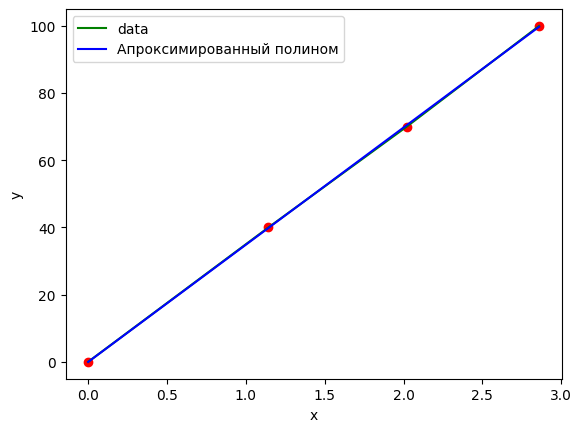

In [ ]:
# Точки данных
points = [(2.86, 100), (2.02, 70), (1.143, 40), (0, 0)]

# Разделяем точки на x и y
y, x = zip(*points)
x = np.array(x)
y = np.array(y)

# Экспоненциальная функция
def func(x, a, b):
    return a * x + b


# Находим параметры a и b
params, covariance = curve_fit(func, x, y)
print(f"y = {params[0]:.8f} * x + {params[1]:.8f}")

# Строим график
x_fit = np.linspace(min(x), max(x), 100)
y_fit = func(x_fit, *params)

plt.scatter(x, y, color="red")  # Отображаем исходные точки
plt.plot(
    x, y, label="data", color="green"
)
plt.plot(x_fit, y_fit, label="Апроксимированный полином", color="blue")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

y = 0.09556781 / (x + 4.19694606) + -0.02272167


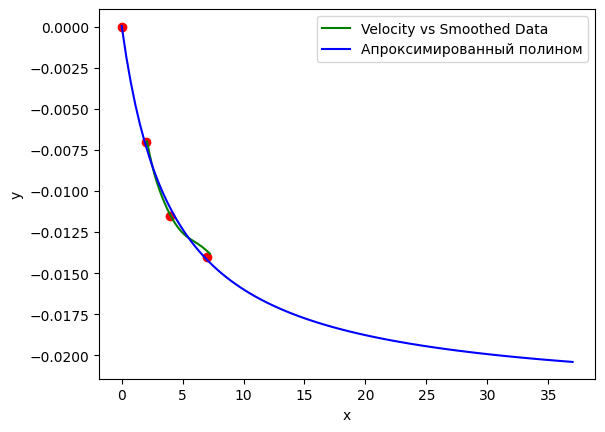

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Заданные точки
x = np.array([0, 2, 4, 7])  # Замените на реальные значения
y = np.array([0, -0.007, -0.0115, -0.014])  # Замените на реальные значения


# Экспоненциальная функция
def func(x, a, b, c):
    return a / (x + b) + c


# Находим параметры a и b
params, covariance = curve_fit(func, x, y)
print(f"y = {params[0]:.8f} / (x + {params[1]:.8f}) + {params[2]:.8f}")

# Строим график
x_fit = np.linspace(min(x), 37, 100)
y_fit = func(x_fit, *params)

plt.scatter(x, y, color="red")  # Отображаем исходные точки
plt.plot(
    smoothed_data_aligned, velocity, label="Velocity vs Smoothed Data", color="green"
)
plt.plot(x_fit, y_fit, label="Апроксимированный полином", color="blue")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()